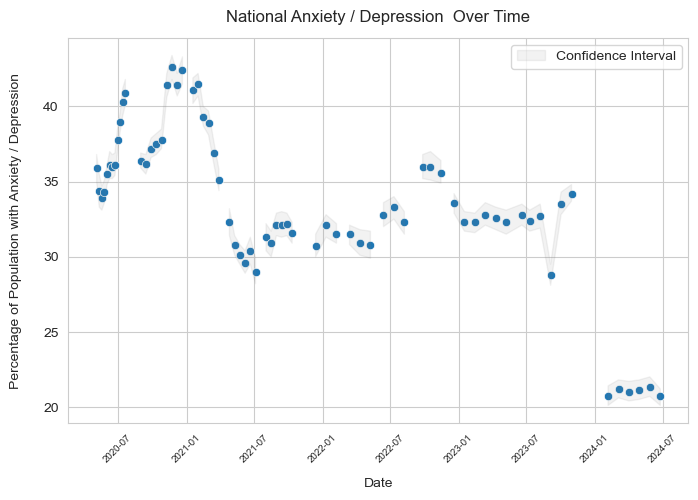

In [438]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

anx_dep = pd.read_csv(r"C:\Users\ksong\Downloads\Indicators_of_Anxiety_or_Depression_Based_on_Reported_Frequency_of_Symptoms_During_Last_7_Days_20240721.csv")

# Convert to datetime type
anx_dep['Time Period Start Date'] = pd.to_datetime(anx_dep['Time Period Start Date'], format='%m/%d/%Y') 
anx_dep['Time Period End Date'] = pd.to_datetime(anx_dep['Time Period End Date'], format='%m/%d/%Y') 

# Filters
anx_or_dep = anx_dep[anx_dep['Indicator'] == 'Symptoms of Anxiety Disorder or Depressive Disorder']
national = anx_or_dep[anx_or_dep['Group'] == 'National Estimate']

# National anxiety/depression line plot with confidence interval columns data
plt.figure(figsize=(8, 5))
sns.set_style('whitegrid')
sns.scatterplot(data=national, x='Time Period End Date', y='Value')

plt.fill_between(national['Time Period End Date'], national['Low CI'], national['High CI'], color='gray', alpha=.1, 
                 label='Confidence Interval')
plt.legend()

plt.xlabel('Date', labelpad=10)
plt.xticks(fontsize=7, rotation=45)
plt.ylabel('Percentage of Population with Anxiety / Depression', labelpad=15)
plt.title('National Anxiety / Depression  Over Time', y=1.02)

plt.show()

# Results show overall decreasing trend over time since end of 2020

<Axes: xlabel='Subgroup', ylabel='Subgroup'>

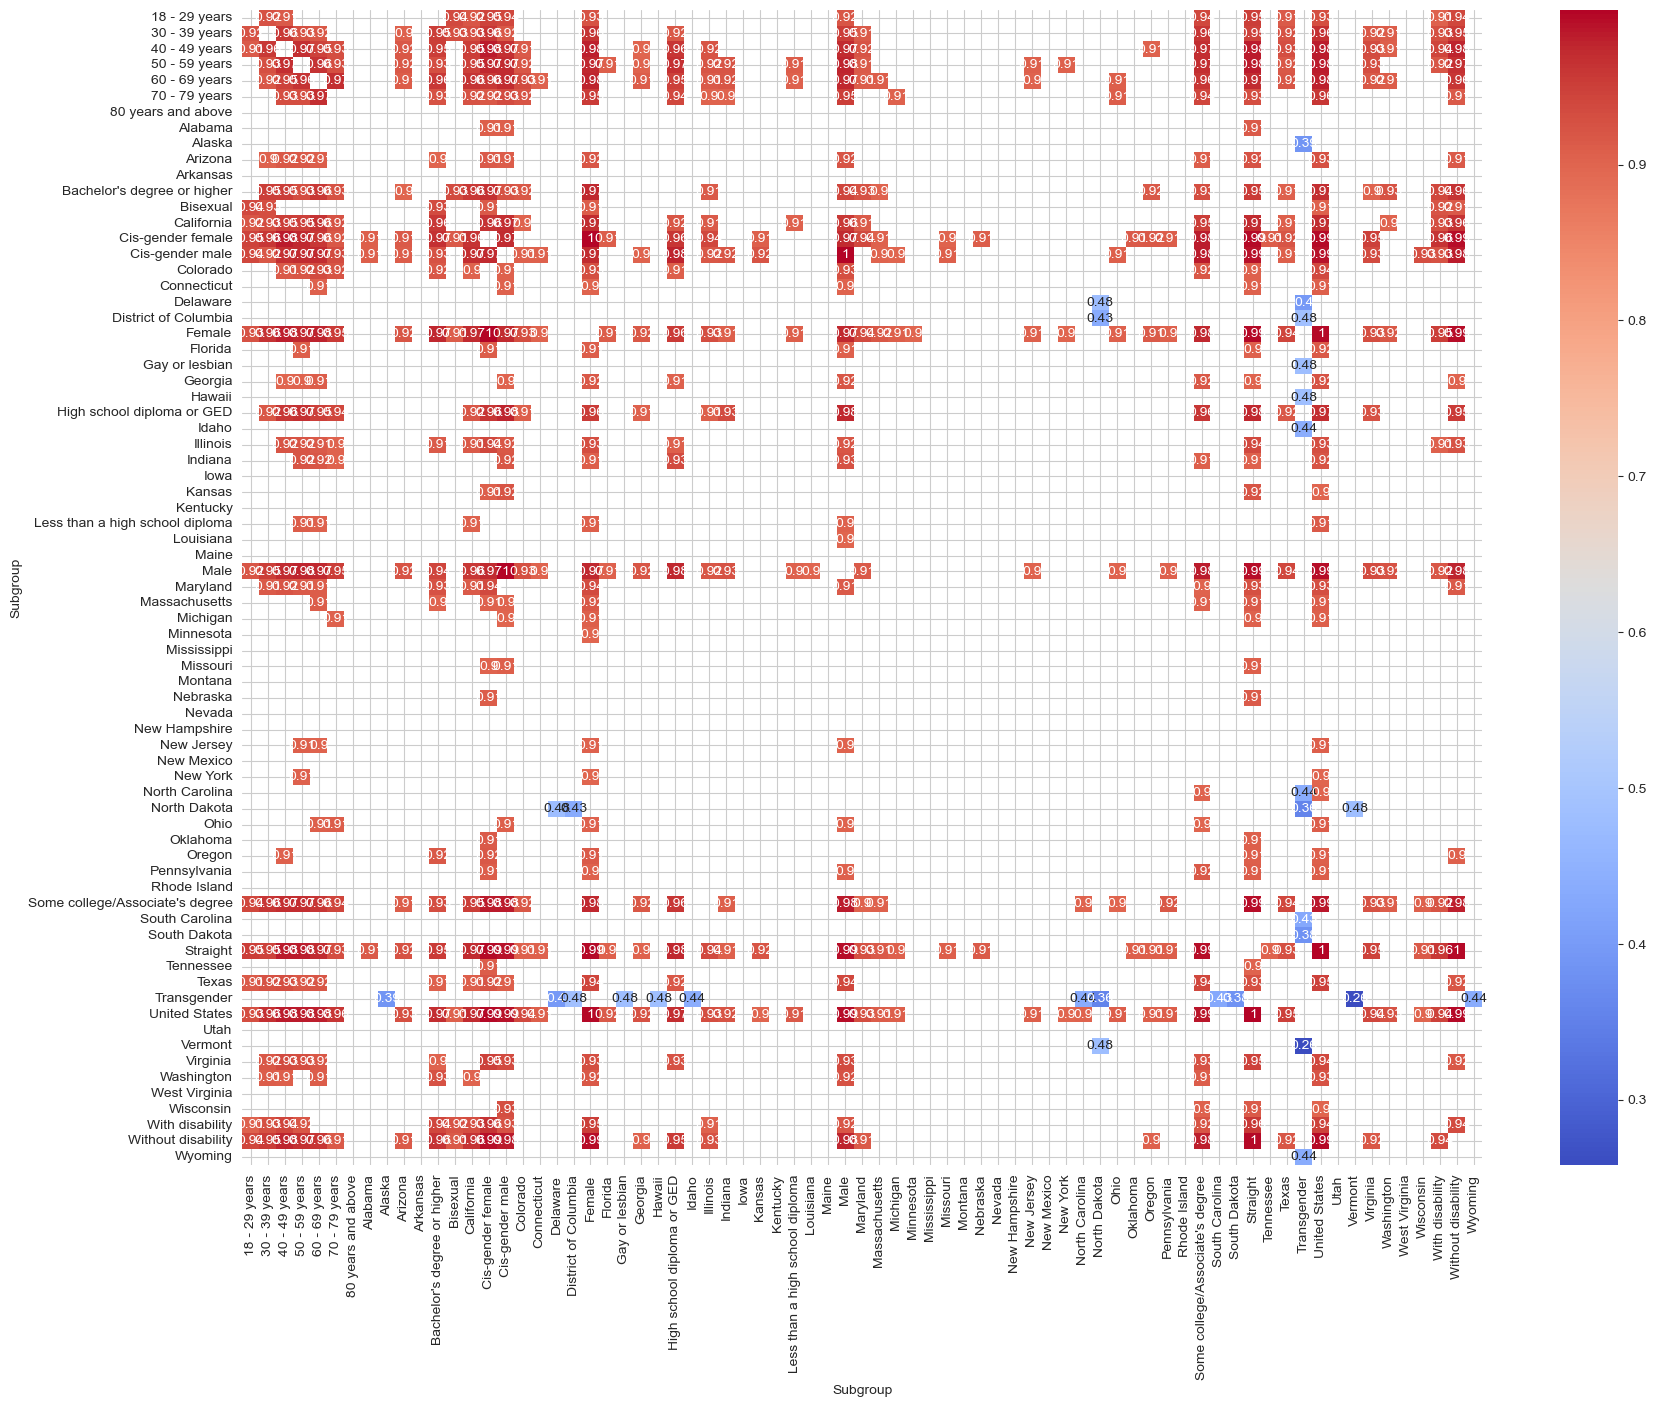

In [439]:
# Search for possible correlations

anx_or_dep.groupby('Group').size()

# Pivot of subgroup means
subgroups_pivot = all_filters.pivot_table(index ='Time Period Label', columns='Subgroup', values='Value', aggfunc='mean')

# Filter for outlier correlation values
subgroup_filtered_corr = subgroups_pivot.corr()[((subgroups_pivot.corr() < 0.5) | (subgroups_pivot.corr() > 0.9)) & (subgroups_pivot.corr() < 1.0)]

plt.figure(figsize=(20, 15))
sns.heatmap(subgroup_filtered_corr, annot=True, cmap='coolwarm')


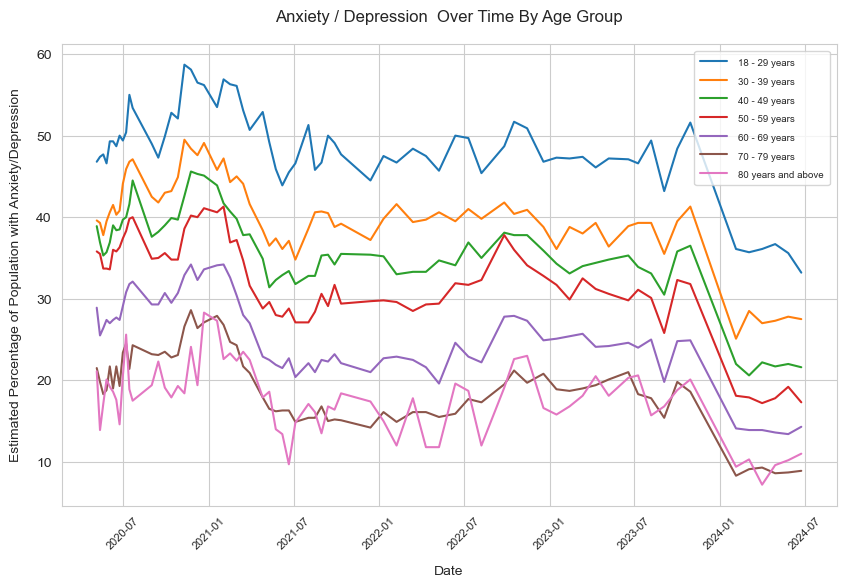

In [440]:
# By age-group plot

age = anx_or_dep[anx_or_dep['Group'] == 'By Age']

plt.figure(figsize=(10, 6))
sns.lineplot(data=age, x='Time Period End Date', y='Value', hue='Subgroup')
plt.xlabel('Date', labelpad=10)
plt.xticks(fontsize=8, rotation=45)
plt.ylabel('Estimated Percentage of Population with Anxiety/Depression', labelpad=10)
plt.title('Anxiety / Depression  Over Time By Age Group', y=1.03)
plt.setp(plt.legend().get_texts(), fontsize='7')
plt.show()

# Age and reported anxiety / depression seem to be inversely correlated

In [441]:
# By states groupings

state = anx_or_dep[anx_or_dep['Group'] == 'By State']

state_least_ten = state_means.sort_values()[:10]

state_most_ten = state_means.sort_values(ascending=False)[:10]

print("Least Percentage of Population with Anxiety / Depression in Last 4 Years") 
print(state_least_ten)
print("\n")
print("Highest Percentage of Population with Anxiety / Depression in Last 4 Years") 
print(state_most_ten)



Least Percentage of Population with Anxiety / Depression in Last 4 Years
State
South Dakota     27.772464
Minnesota        28.249275
Wisconsin        28.672464
North Dakota     28.753623
Nebraska         29.952174
Delaware         30.244928
Hawaii           30.314493
Iowa             30.321739
Vermont          30.646377
New Hampshire    30.792754
Name: Value, dtype: float64


Highest Percentage of Population with Anxiety / Depression in Last 4 Years
State
Louisiana        38.186957
Mississippi      37.479710
Oklahoma         36.920290
Nevada           36.676812
West Virginia    36.486957
Arkansas         36.228986
Kentucky         36.094203
Oregon           36.053623
New Mexico       35.901449
Texas            35.552174
Name: Value, dtype: float64


Text(0.5, 1.03, 'Anxiety / Depression  Over Time By Gender Identity')

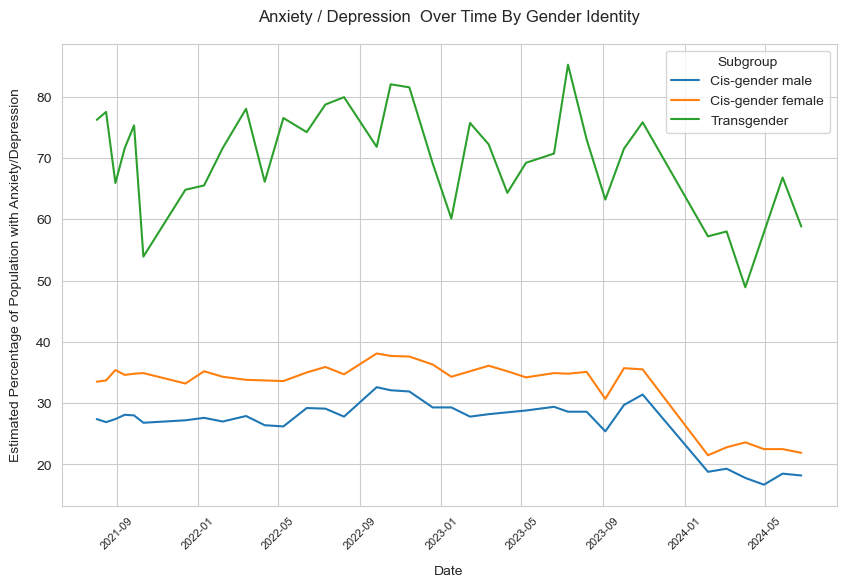

In [442]:
# By gender identity plot
# Filters for later use

plt.figure(figsize=(10, 6))
sns.lineplot(data=gender, x='Time Period End Date', y='Value', hue='Subgroup')
plt.xlabel('Date', labelpad=10)
plt.xticks(fontsize=8, rotation=45)
plt.ylabel('Estimated Percentage of Population with Anxiety/Depression', labelpad=10)
plt.title('Anxiety / Depression  Over Time By Gender Identity', y=1.03)

# The transgender sub-group has a sustained overall higher percentage of population with anxiety / depression